In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore',)

In [2]:
import os
os.getcwd()

'C:\\Users\\ABC'

In [3]:
#reading the file with is place in there mother directory
insurance= pd.read_csv ( "insurance.csv" )

In [4]:
#quick look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#creating descriptive statistics
insurance.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Making copy of the dataset
df = insurance.copy()

In [14]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance.sex = le.transform(insurance.sex)

# smoker or not
le.fit(insurance.smoker.drop_duplicates()) 
insurance.smoker = le.transform(insurance.smoker)

#region
le.fit(insurance.region.drop_duplicates()) 
insurance.region = le.transform(insurance.region)

In [15]:
insurance.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

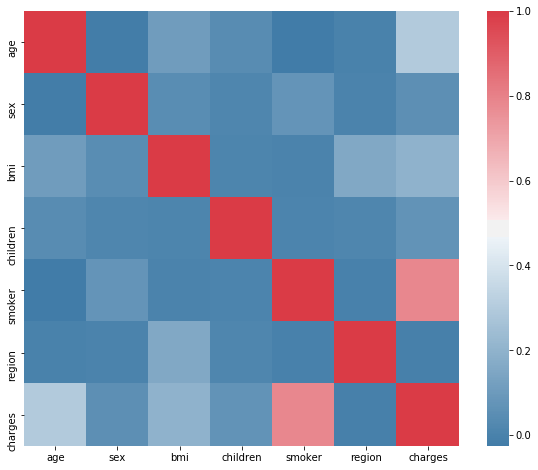

In [16]:
f, ax = pl.subplots(figsize=(10, 8))
corr = insurance.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Text(0.5,1,'Distribution of charges for non-smokers')

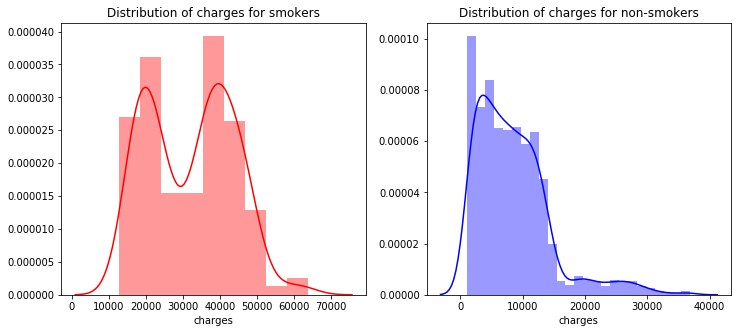

In [30]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insurance[(insurance.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(insurance[(insurance.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

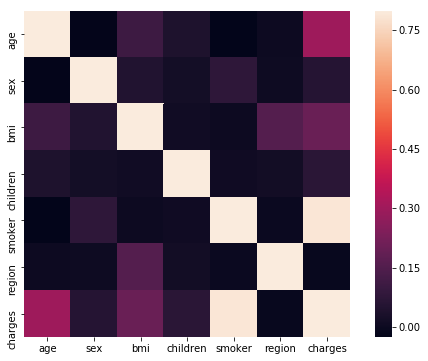

In [24]:
#preparing corelation matrix plot
f, ax=pl.subplots(figsize = (9,6))
sns.heatmap(corr, vmax = .8, square = True);

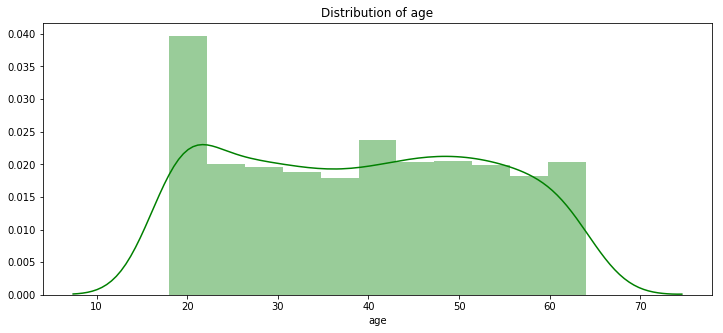

In [29]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(insurance["age"], color = 'g')


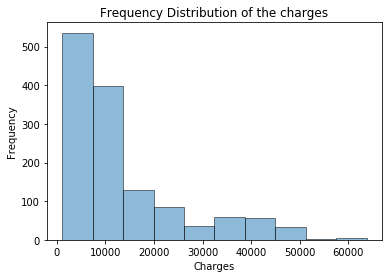

In [85]:
%matplotlib inline
pl.hist(df.charges,bins = 10,alpha=0.5,histtype='bar',ec='black')
pl.title("Frequency Distribution of the charges")
pl.xlabel('Charges')
pl.ylabel('Frequency')
pl.show()

#The below plot represents the ditribution of the medical charges which tells us 
#how many patients spend how much money on treatment on average.

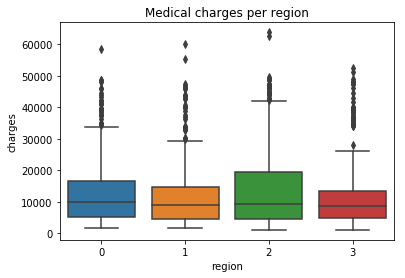

In [84]:
sns.boxplot(x=insurance.region,y=insurance.charges,data=insurance)
pl.title("Medical charges per region")
pl.show()

#The below boxplot shows money spent by people on their treatment in different regions.
#From the plot we can say that the region doesn't have much impact on medical charges.



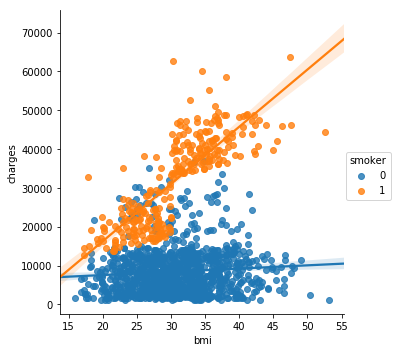

In [81]:
sns.lmplot(x="bmi",y='charges',hue='smoker',data=insurance)

#Medical charge increases in case of smoker with the increasing bmi. 
#But in case of non-smokers the increase in bmi doesn't have large impact on the medical charges.



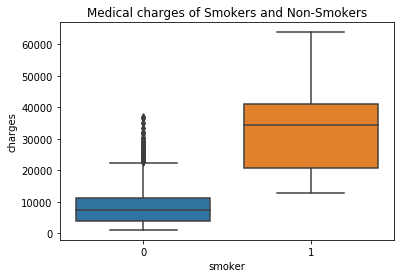

In [83]:
sns.boxplot(x=insurance.smoker,y=insurance.charges,data=insurance)
pl.title("Medical charges of Smokers and Non-Smokers")
pl.show()

#The boxplot between the medical charges of smokers and non-smokers conveys 
#that those who smoke spend around 4 times more on medicines or treatment as comparerd to those who don't smoke.



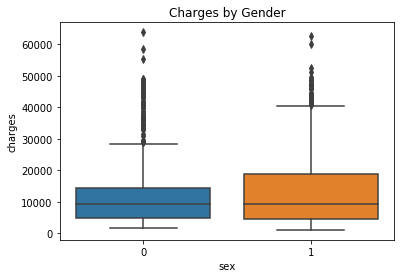

In [82]:
sns.boxplot(x=insurance.sex,y=insurance.charges,data=insurance)
pl.title("Charges by Gender")
pl.show()

#The boxplot between sex and charges shows that there is no gender biasing with the medical charges . 
#It doesn't matter whether you are a male or a female the charges remains same for all.



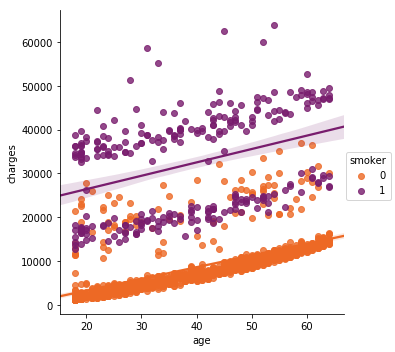

In [87]:
#In the case of non-smokers,the cost of treatment increases with age, while in case of the smokers,
#there is not do such dependence. We can also see that age has positive correlation and has larger affect after the smoker
#that leads to increase in the charges. 
#And it is also a common phenomenon that with increasing age medical expenses willincrease whether you are a smokeror not.

sns.lmplot(x='age',y='charges',hue='smoker',data=insurance,palette='inferno_r')